In [18]:
%matplotlib inline

In [1]:
import vaex

import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (16, 8)

# 表示

In [3]:
df = vaex.example()

wget failed, using urlretrieve


In [4]:
df

#,E,FeH,L,Lz,random_index,vx,vy,vz,x,y,z
0,-121238.171875,-2.309227609164518,831.0799560546875,-336.426513671875,1511648,53.276722,288.386047,-95.2649078,-0.777470767,2.10626292,1.93743467
1,-100819.9140625,-1.788735491591229,1435.1839599609375,-828.7567749023438,2728665,252.810791,-69.9498444,-56.3121033,3.77427316,2.23387194,3.76209331
2,-100559.9609375,-0.7618109022478798,1039.2989501953125,920.802490234375,1202632,96.276474,226.440201,-34.7527161,1.3757627,-6.3283844,2.63250017
3,-70174.8515625,-1.5208778422936413,2441.724853515625,1183.5899658203125,1020502,204.968842,-205.679016,-58.9777031,-7.06737804,1.31737781,-6.10543537
4,-144138.75,-2.655341358427361,374.8164367675781,-314.5353088378906,3154816,-311.742371,-238.41217,186.824127,0.243441463,-0.822781682,-0.206593871
...,...,...,...,...,...,...,...,...,...,...,...
"329,995",-119687.3203125,-1.6499842518381402,746.8833618164062,-508.96484375,1919483,107.432999,-2.13771296,17.5130272,3.76883793,4.66251659,-4.42904139
"329,996",-68933.8046875,-1.4336036247720836,2395.633056640625,1275.490234375,1064141,32.0,108.089264,179.060638,9.17409325,-8.87091351,-8.61707687
"329,997",-112580.359375,-1.9306227597361942,1182.436279296875,115.58557891845703,374845,8.46711349,-38.2765236,-127.541473,-1.14041007,-8.4957695,2.25749826
"329,998",-74862.90625,-1.225019818838568,1324.5926513671875,1057.017333984375,425745,110.221558,-31.3925591,86.2726822,-14.2985935,-5.51750422,-8.65472317


In [6]:
df.columns.keys()

odict_keys(['E', 'FeH', 'L', 'Lz', 'random_index', 'vx', 'vy', 'vz', 'x', 'y', 'z'])

In [7]:
df.x # df['x']も同じ

Expression = x
Length: 330,000 dtype: float64 (column)
---------------------------------------
     0  -0.777471
     1    3.77427
     2    1.37576
     3   -7.06738
     4   0.243441
       ...       
329995    3.76884
329996    9.17409
329997   -1.14041
329998   -14.2986
329999    10.5451

# 評価

In [8]:
df.evaluate(df.x)

array([ -0.77747077,   3.77427316,   1.3757627 , ...,  -1.14041007,
       -14.2985935 ,  10.5450506 ])

In [9]:
exp = np.sqrt(df.x**2 + df.y**2 + df.z**2)

In [10]:
df.evaluate(exp)

array([ 2.96554504,  5.77829281,  6.99079604, ...,  8.86425027,
       17.60104719, 14.54018152])

In [11]:
df['v'] = np.sqrt(df.x**2 + df.y**2 + df.z**2)
df[['x', 'y', 'z', 'v']]

#,x,y,z,v
0,-0.777470767,2.10626292,1.93743467,2.9655450396553587
1,3.77427316,2.23387194,3.76209331,5.77829281049018
2,1.3757627,-6.3283844,2.63250017,6.99079603950256
3,-7.06737804,1.31737781,-6.10543537,9.431842752707537
4,0.243441463,-0.822781682,-0.206593871,0.8825613121347967
...,...,...,...,...
"329,995",3.76883793,4.66251659,-4.42904139,7.453831761514681
"329,996",9.17409325,-8.87091351,-8.61707687,15.398412491068198
"329,997",-1.14041007,-8.4957695,2.25749826,8.864250273925633
"329,998",-14.2985935,-5.51750422,-8.65472317,17.601047186042507


# 選択

In [12]:
df.select(df.x < 0)
df.evaluate(df.x, selection=True)

array([ -0.77747077,  -7.06737804,  -5.17174435, ...,  -1.87310386,
        -1.14041007, -14.2985935 ])

# 統計処理

In [13]:
df.count()

array(330000.)

In [14]:
df.mean(df.x)

-0.06713149126400597

In [16]:
df.mean(df.x, selection=True)

-5.211037972111967

# 可視化

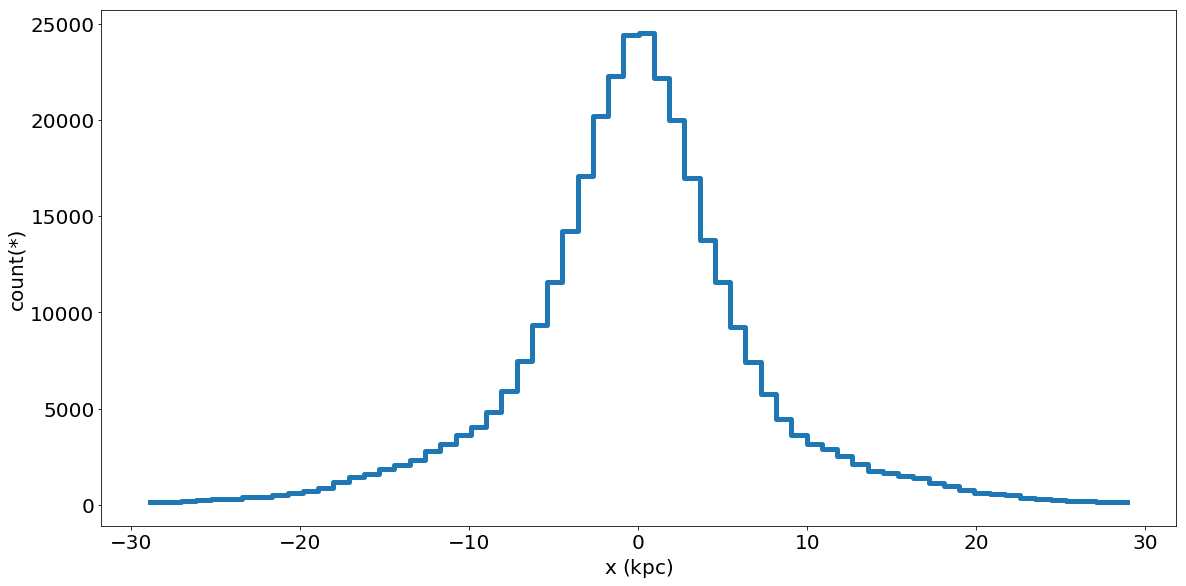

In [49]:
ax, = df.plot1d(df.x, linewidth=5)
ax.axes.tick_params(axis='both', labelsize=20)
ax.axes.xaxis.label.set_size(20)
ax.axes.yaxis.label.set_size(20)

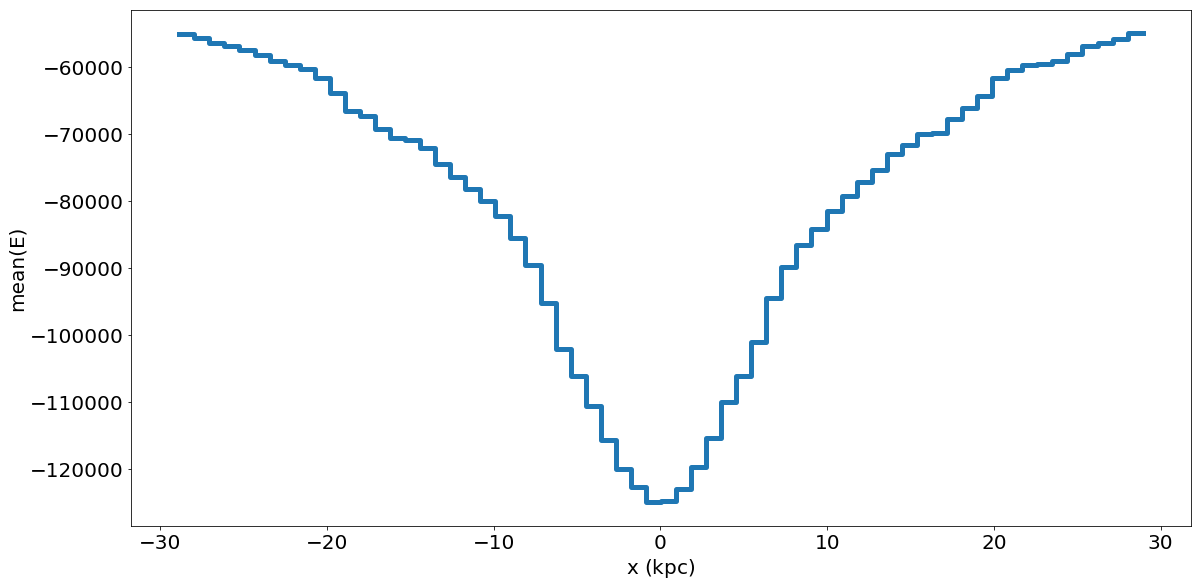

In [59]:
ax, = df.plot1d(df.x, what='mean(E)', linewidth=5)
ax.axes.tick_params(axis='both', labelsize=20)
ax.axes.xaxis.label.set_size(20)
ax.axes.yaxis.label.set_size(20)

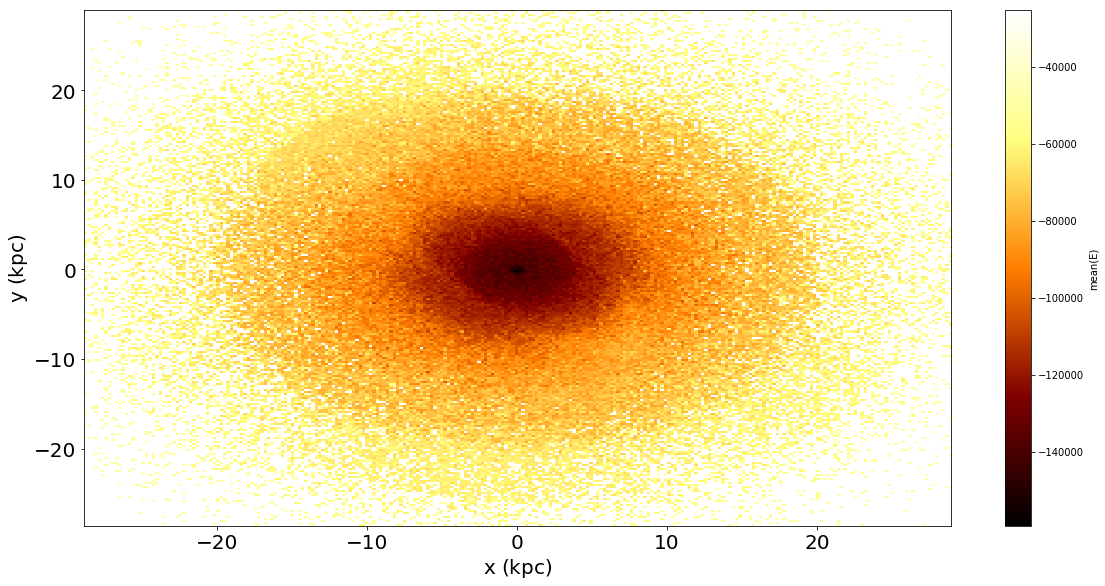

In [68]:
ax = df.plot(df.x, df.y, what=vaex.stat.mean(df.E))
ax.axes.tick_params(axis='both', labelsize=20)
ax.axes.xaxis.label.set_size(20)
ax.axes.yaxis.label.set_size(20)

# Join

In [88]:
a = np.array(['a', 'b', 'c'])
x = np.arange(1,4)
df1 = vaex.from_arrays(a=a, x=x)

In [89]:
b = np.array(['a', 'b', 'd'])
y = x**2
df2 = vaex.from_arrays(b=b, y=y)

In [90]:
df1

#,a,x
0,a,1
1,b,2
2,c,3


In [91]:
df2

#,b,y
0,a,1
1,b,4
2,d,9


In [92]:
df1.join(df2, left_on='a', right_on='b')

#,a,x,b,y
0,a,1,a,1
1,b,2,b,4
2,c,3,--,--


# JIT

In [108]:
exp = np.sqrt(df.x**2 + df.y**2 + df.z**2)
df.evaluate(exp)
df.evaluate(exp.jit_numba())

array([ 2.96554504,  5.77829281,  6.99079604, ...,  8.86425027,
       17.60104719, 14.54018152])

# 機械学習

In [111]:
import vaex.ml.cluster
import vaex.ml.datasets

In [112]:
import vaex.ml.xgboost
import vaex.ml.datasets

In [113]:
df = vaex.ml.datasets.load_iris()

In [116]:
expressions = [
    df.col.petal_width, 
    df.col.petal_length, 
    df.col.sepal_width, 
    df.col.sepal_length
]

features = [k.expression for k in expressions]

In [114]:
df_train, df_test = df.ml.train_test_split()

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/vaex/ml/__init__.py:139: UserWarning: make sure the dataset is shuffled
  warnings.warn('make sure the dataset is shuffled')


In [123]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3  # the number of classes that exist in this datset
}


In [128]:
model = vaex.ml.xgboost.XGBModel(
    features=features, num_round=10, param=param
)

In [129]:
model.fit(df_train, df_train.class_, copy=True)

In [130]:
df_predict = model.transform(df_test)

In [131]:
df_predict

#,sepal_width,petal_length,sepal_length,petal_width,class_,random_index,xgboost_prediction
0,3.0,4.2,5.9,1.5,1,114,1.0
1,3.0,4.6,6.1,1.4,1,74,1.0
2,2.9,4.6,6.6,1.3,1,37,1.0
3,3.3,5.7,6.7,2.1,2,116,2.0
4,4.2,1.4,5.5,0.2,0,61,0.0
...,...,...,...,...,...,...,...
25,2.5,4.0,5.5,1.3,1,83,1.0
26,2.7,3.9,5.8,1.2,1,94,1.0
27,2.9,1.4,4.4,0.2,0,54,0.0
28,2.3,1.3,4.5,0.3,0,145,0.0
